### Author: Vaishnav Krishna P
- vyshnavkrishnap2020@gamil.com

### 1. Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2. Import Libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import matthews_corrcoef
import seaborn as sns

### 3. Define Dataset Path

In [ ]:
data_dir = "/content/drive/MyDrive/Autism Images"

IMG_SIZE = 128
BATCH_SIZE = 32

### 4. Load Dataset Automatically from Folders

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="both",
    seed=123
)

train_dataset, val_dataset = dataset


Found 547 files belonging to 2 classes.
Using 438 files for training.
Using 109 files for validation.


### 5. Normalize Images

In [ ]:
normalization_layer = layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

### 6: Build Basic CNN Model

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')   # Binary classification
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 7: Compile Model

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### 8: Train Model

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20
)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 147s 10s/step - accuracy: 0.5971 - loss: 0.6653 - val_accuracy: 0.6881 - val_loss: 0.6134
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.7223 - loss: 0.5370 - val_accuracy: 0.7339 - val_loss: 0.5108
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 202ms/step - accuracy: 0.7674 - loss: 0.5148 - val_accuracy: 0.7156 - val_loss: 0.5261
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.7879 - loss: 0.4793 - val_accuracy: 0.7339 - val_loss: 0.5420
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 0.7411 - loss: 0.4978 - val_accuracy: 0.7339 - val_loss: 0.5421
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.8433 - loss: 0.3990 - val_accuracy: 0.7431 - val_loss: 0.5657
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 206ms/step - accuracy: 0.8414 - loss: 0.3771 - val_accuracy: 0.7523 - val_loss: 0.5700
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 291ms/step - accuracy: 0.8385 - loss: 0.3328 - val_accuracy: 0.

### 9: Evaluate Model

In [ ]:
# Get predictions
y_true = []
y_pred = []

for images, labels in val_dataset:
    preds = model.predict(images)
    preds = (preds > 0.5).astype(int)

    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)  # Sensitivity
f1 = f1_score(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1 Score:", f1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
Accuracy: 0.7522935779816514
Precision: 0.6538461538461539
Recall (Sensitivity): 0.7906976744186046
F1 Score: 0.7157894736842105


In [ ]:
mcc = matthews_corrcoef(y_true, y_pred)

print("Matthews Correlation Coefficient (MCC):", mcc)

Matthews Correlation Coefficient (MCC): 0.5068413506068465


### 10: Confusion Matrix

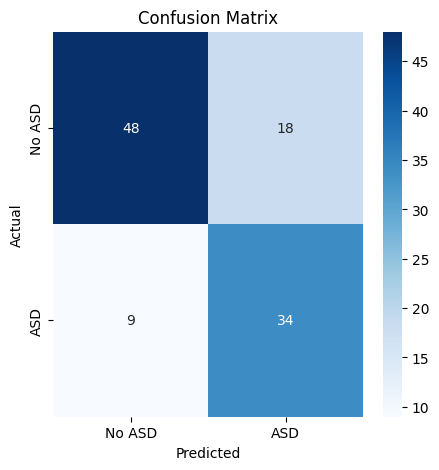

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No ASD", "ASD"],
            yticklabels=["No ASD", "ASD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

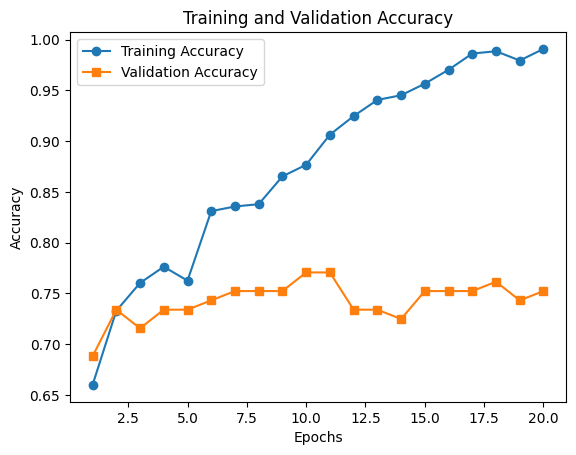

In [ ]:
# Get history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure()
plt.plot(epochs_range, acc, marker='o')
plt.plot(epochs_range, val_acc, marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()


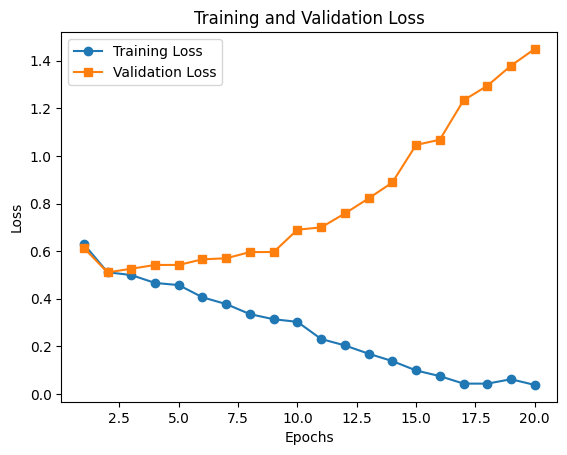

In [ ]:
# Plot Loss
plt.figure()
plt.plot(epochs_range, loss, marker='o')
plt.plot(epochs_range, val_loss, marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

- Note: The large discrepancy between training (99%) and validation (75%) accuracy confirms overfitting in the CNN model.